In [3]:
import pandas as pd


# news_df = pd.read_csv("data/news_articles.csv")
train_users = pd.read_csv("data/train_users.csv")
test_users = pd.read_csv("data/test_users.csv")

print(test_users.head())
print(train_users.head())


  user_id   age  income  clicks  purchase_amount  session_duration  \
0   U4058  36.0   10000       4           500.00              2.54   
1   U1118  33.0   19607       8          1906.81             39.74   
2   U6555  51.0   21049      11           500.00             46.07   
3   U9170  58.0   25752      13           500.00             60.86   
4   U3348  32.0   25302      12          2693.22             39.77   

   content_variety  engagement_score  num_transactions  avg_monthly_spend  \
0          0.47162          49.32668                 8             229.80   
1          0.55219          56.42526                 4             819.43   
2          0.69961          58.88307                 5             113.35   
3          0.86843          86.15690                 8             237.13   
4          0.81805          84.82418                 5            1491.56   

   ...  loyalty_index  screen_brightness  battery_percentage  \
0  ...           13.0                3.0            

In [6]:
# Data preprocessing and feature engineering
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Examine the data
print("Dataset shape:", train_users.shape)
print("\nColumn names:")
print(train_users.columns.tolist())
print("\nTarget distribution:")
print(train_users['label'].value_counts())
print("\nMissing values:")
print(train_users.isnull().sum())

Dataset shape: (2000, 33)

Column names:
['user_id', 'age', 'income', 'clicks', 'purchase_amount', 'session_duration', 'content_variety', 'engagement_score', 'num_transactions', 'avg_monthly_spend', 'avg_cart_value', 'browsing_depth', 'revisit_rate', 'scroll_activity', 'time_on_site', 'interaction_count', 'preferred_price_range', 'discount_usage_rate', 'wishlist_size', 'product_views', 'repeat_purchase_gap (days)', 'churn_risk_score', 'loyalty_index', 'screen_brightness', 'battery_percentage', 'cart_abandonment_count', 'browser_version', 'background_app_count', 'session_inactivity_duration', 'network_jitter', 'region_code', 'subscriber', 'label']

Target distribution:
label
user_2    712
user_1    707
user_3    581
Name: count, dtype: int64

Missing values:
user_id                          0
age                            698
income                           0
clicks                           0
purchase_amount                  0
session_duration                 0
content_variety       

In [14]:
# Prepare features and labels
X = train_users.drop(['user_id', 'label'], axis=1)
y = train_users['label']

# Handle missing values in age column (fill with median)
X['age'] = X['age'].fillna(X['age'].median())

# Encode categorical features
label_encoders = {}
categorical_columns = ['region_code', 'subscriber', 'browser_version']

for col in categorical_columns:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"\nFeatures: {X.columns.tolist()}")


Training set size: (1600, 31)
Validation set size: (400, 31)

Features: ['age', 'income', 'clicks', 'purchase_amount', 'session_duration', 'content_variety', 'engagement_score', 'num_transactions', 'avg_monthly_spend', 'avg_cart_value', 'browsing_depth', 'revisit_rate', 'scroll_activity', 'time_on_site', 'interaction_count', 'preferred_price_range', 'discount_usage_rate', 'wishlist_size', 'product_views', 'repeat_purchase_gap (days)', 'churn_risk_score', 'loyalty_index', 'screen_brightness', 'battery_percentage', 'cart_abandonment_count', 'browser_version', 'background_app_count', 'session_inactivity_duration', 'network_jitter', 'region_code', 'subscriber']


In [40]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, min_samples_split=5)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9862
Validation Accuracy: 0.9050


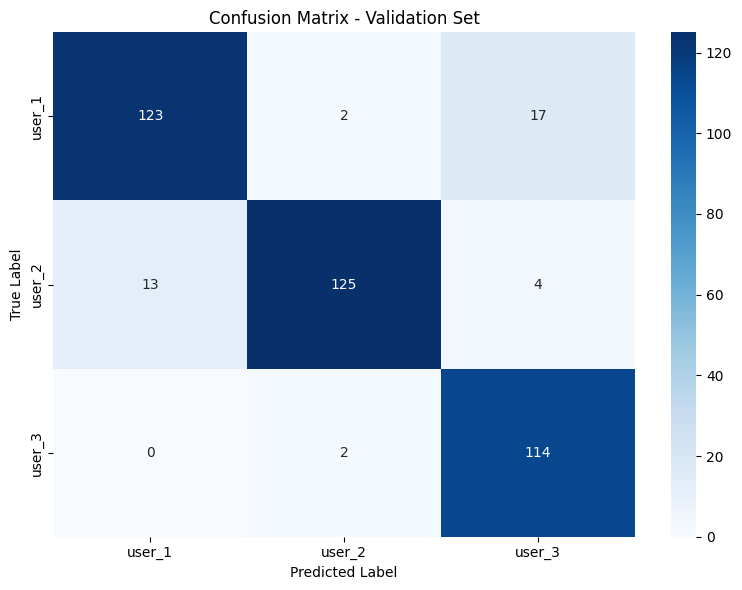

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['user_1', 'user_2', 'user_3'],
            yticklabels=['user_1', 'user_2', 'user_3'])
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()